In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img_path = '/content/drive/MyDrive/Cricketers/model/test_images/virat_test1.jpeg'
img = cv2.imread(img_path)
img.shape

(282, 178, 3)

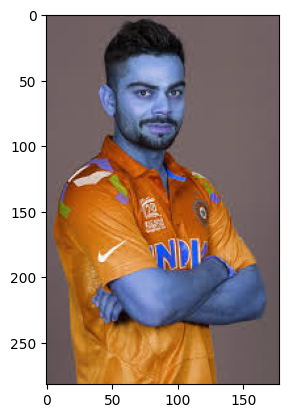

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(282, 178)

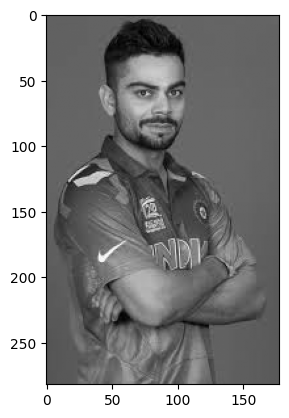

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Cricketers/model/opencv/harcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Cricketers/model/opencv/harcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1, minNeighbors=3)
faces

array([[50, 32, 72, 72]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]

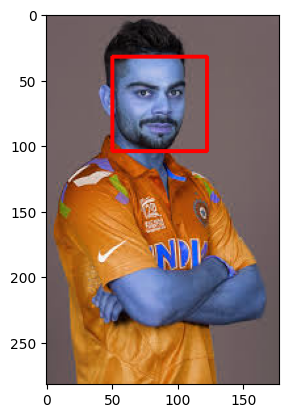

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

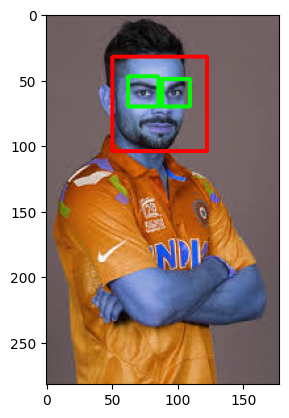

In [10]:
cv2.destroyAllWindows
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

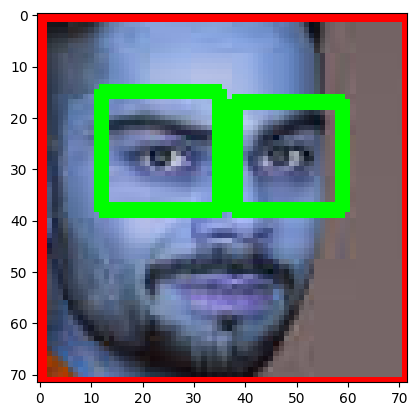

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
  img = cv2.imread(image_path)
  if img is None:
    print("image not loaded properly")
    return None
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1, minNeighbors=3 )
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >=2:
      return roi_color
  return None

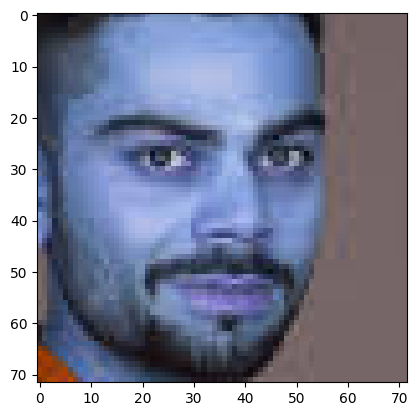

In [13]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Cricketers/model/test_images/virat_test1.jpeg')
plt.imshow(cropped_image)

In [14]:
path_to_data = '/content/drive/MyDrive/Cricketers/model/dataset/'
path_to_cr_data = '/content/drive/MyDrive/Cricketers/model/dataset/cropped/'

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [16]:
img_dirs

['/content/drive/MyDrive/Cricketers/model/dataset/KL_Rahul',
 '/content/drive/MyDrive/Cricketers/model/dataset/Bumrah',
 '/content/drive/MyDrive/Cricketers/model/dataset/MS_Dhoni',
 '/content/drive/MyDrive/Cricketers/model/dataset/Rohit_Sharma',
 '/content/drive/MyDrive/Cricketers/model/dataset/Virat_Kohli',
 '/content/drive/MyDrive/Cricketers/model/dataset/cropped']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
  count = 1
  celebrity_names = img_dir.split('/')[-1]
  celebrity_file_names_dict[celebrity_names] = []

  for entry in os.scandir(img_dir):
    roi_color = get_cropped_image_if_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder = path_to_cr_data + celebrity_names
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print(cropped_folder)

      cropped_file_name = celebrity_names + str(count) + ".png"
      cropped_file_path = cropped_folder + "/" + cropped_file_name
      cv2.imwrite(cropped_file_path, roi_color)
      celebrity_file_names_dict[celebrity_names].append(cropped_file_path)
      count += 1


/content/drive/MyDrive/Cricketers/model/dataset/cropped/KL_Rahul
image not loaded properly
/content/drive/MyDrive/Cricketers/model/dataset/cropped/Bumrah
/content/drive/MyDrive/Cricketers/model/dataset/cropped/MS_Dhoni
image not loaded properly
/content/drive/MyDrive/Cricketers/model/dataset/cropped/Rohit_Sharma
/content/drive/MyDrive/Cricketers/model/dataset/cropped/Virat_Kohli
image not loaded properly
image not loaded properly
image not loaded properly
image not loaded properly
image not loaded properly
image not loaded properly
image not loaded properly


In [19]:
pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.6 MB/s eta 0:00:00


In [20]:
import numpy as np
import pywt
import cv2
def w2d(img, mode='haar', level=1):
  imArray = img
  imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
  imArray = np.float32(imArray)
  imArray /= 255;
  coeffs = pywt.wavedec2(imArray, mode, level=level)
  coeffs_H=list(coeffs)
  coeffs_H[0] *= 0;
  imArray_H = pywt.waverec2(coeffs_H, mode);
  imArray_H *=255;
  imArray_H = np.uint8(imArray_H)
  return imArray_H

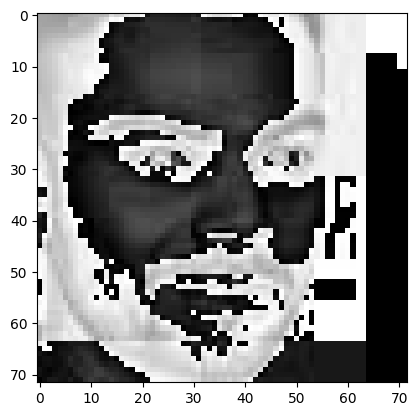

In [21]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
  class_dict[celebrity_name] = count
  count +=1
class_dict


{'KL_Rahul': 0,
 'Bumrah': 1,
 'MS_Dhoni': 2,
 'Rohit_Sharma': 3,
 'Virat_Kohli': 4,
 'cropped': 5}

In [23]:
X = []
y = []


for celebrity_names, training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    if img is None:
      continue
    scaled_raw_img = cv2.resize(img,(32,32))
    img_har = w2d(img,'db1',5)
    scaled_image_har = cv2.resize(img_har,(32,32))
    combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_image_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(class_dict[celebrity_names])

In [24]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(109, 4096)

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scalar', StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)


0.5

In [27]:
len(X_test)

28

In [28]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.50      0.25      0.33         4
           2       0.50      0.75      0.60         4
           3       0.67      0.33      0.44         6
           4       0.38      0.71      0.50         7

    accuracy                           0.50        28
   macro avg       0.56      0.50      0.48        28
weighted avg       0.57      0.50      0.49        28



In [29]:
 from sklearn import svm
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.linear_model import LogisticRegression
 from sklearn.pipeline import make_pipeline
 from sklearn.model_selection import GridSearchCV

In [30]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf','linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' :{
            'logisticregression__C': [0.5, 1, 5, 10, 20],
            'logisticregression__penalty': ['l1', 'l2'],
            'logisticregression__class_weight': [None, 'balanced']
        }

    }
}

In [31]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
  pipe = make_pipeline(StandardScaler(), mp['model'])
  clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model': algo,
      'best_scores' : clf.best_score_,
      'best_params' : clf.best_params_
  })
  best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores, columns=['model','best_scores','best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_scores,best_params
0,svm,0.605147,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.418382,{'randomforestclassifier__n_estimators': 1}
2,logistic_regression,0.641176,"{'logisticregression__C': 10, 'logisticregress..."


In [32]:
  best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [33]:
best_estimators['svm'].score(X_test,y_test)

0.5

In [34]:
best_estimators['random_forest'].score(X_test,y_test)

0.25

In [35]:
best_clf = best_estimators['logistic_regression']

In [36]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [37]:
import json
with open("class_dictionary.json","w") as f:
  f.write(json.dumps(class_dict))